In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\madfhantr.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum().sum()

149

In [ ]:
len(df)

614

In [ ]:
len(df.dropna())

480

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# 문자열형태의 데이터는 의사결정나무에서 사용불가하므로 숫자로 변경하는 과정이 필요
df.Gender.value_counts(), df.Married.value_counts(), df.Dependents.value_counts() 

(Male      394
 Female     86
 Name: Gender, dtype: int64,
 Yes    311
 No     169
 Name: Married, dtype: int64,
 0     274
 2      85
 1      80
 3+     41
 Name: Dependents, dtype: int64)

In [ ]:
df.Education.value_counts(), df.Self_Employed.value_counts(), df.Property_Area.value_counts() , df.Loan_Status.value_counts()

(Graduate        383
 Not Graduate     97
 Name: Education, dtype: int64,
 No     414
 Yes     66
 Name: Self_Employed, dtype: int64,
 Semiurban    191
 Urban        150
 Rural        139
 Name: Property_Area, dtype: int64,
 Y    332
 N    148
 Name: Loan_Status, dtype: int64)

In [ ]:
df2 = df.iloc[:, 1:]
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df2.Gender = df2.Gender.replace(to_replace = 'Male', value = '1')
df2.Gender = df2.Gender.replace(to_replace = 'Female', value = '0')

df2.Married = df2.Married.replace(to_replace = 'Yes', value = '1')
df2.Married = df2.Married.replace(to_replace = 'No', value = '0')

df2.Self_Employed = df2.Self_Employed.replace(to_replace = 'Yes', value = '1')
df2.Self_Employed = df2.Self_Employed.replace(to_replace = 'No', value = '0')

df2.Education = df2.Education.replace(to_replace = 'Graduate', value = '1')
df2.Education = df2.Education.replace(to_replace = 'Not Graduate', value = '0')

df2.Property_Area = df2.Property_Area.replace(to_replace = 'Urban', value = '2')
df2.Property_Area = df2.Property_Area.replace(to_replace = 'Semiurban', value = '1')
df2.Property_Area = df2.Property_Area.replace(to_replace = 'Rural', value = '0')

df2.Dependents = df2.Dependents.replace(to_replace = '3+', value = '0')

# 종속변수로 사용할 계획이므로 카테고리화 미적용
# df2.Loan_Status = df2.Loan_Status.replace(to_replace = 'Y', value = '1') 
# df2.Loan_Status = df2.Loan_Status.replace(to_replace = 'N', value = '0')

# ApplicantIncome이나 Loan_Amount_Term과 같이 특정 숫자 수치가 모두 다르고 
# 해당값자체가 큰 의미가 없는 경우에는 범위로 묶어서 처리하는것이 더 유의미할 수 있음

In [14]:
X = df2.drop(columns = ['Loan_Status'])
y = df2.Loan_Status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [21]:
df2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

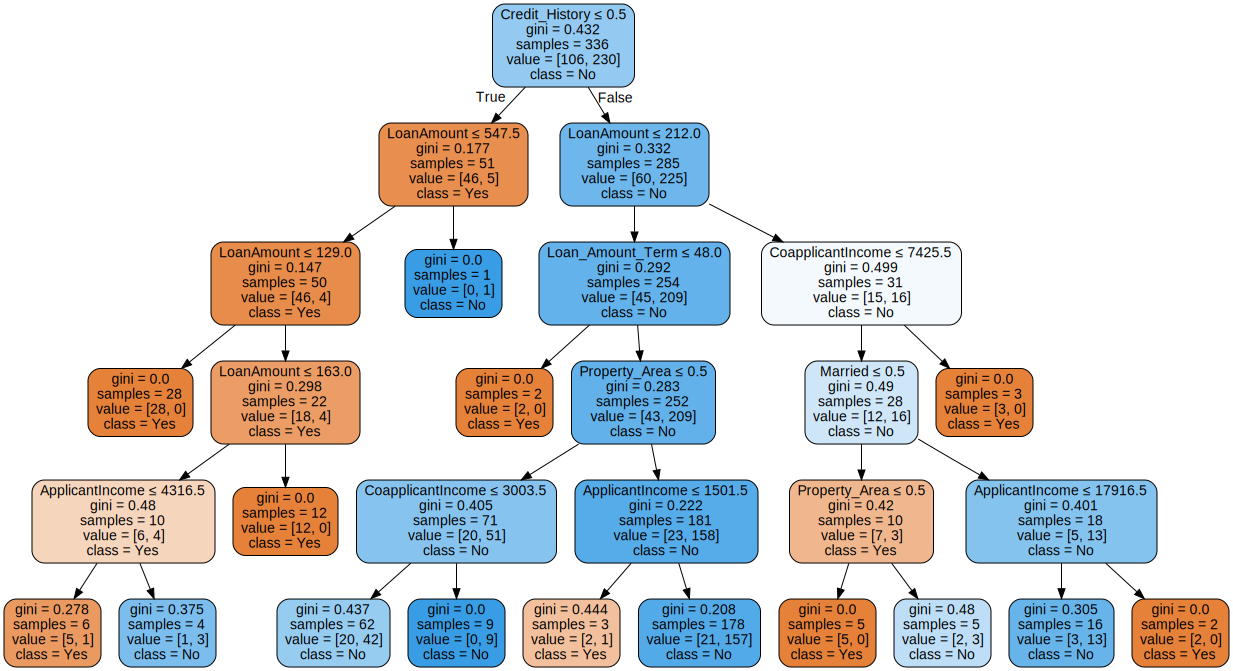

In [22]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names =  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', \
                                                  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', \
                                                  'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
                                class_names = ['Yes', 'No'], filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph